# Finding planets around other stars

####Authors: Antonio Herrera Martin and Mark Dodici
#### Editors: Mark Dodici,  Simran Nerval, Alicia Savelli

### Learning goals
*   Use real astronomical data to apply the Radial velocity method for finding planets.
*   Estimate the planet mass, orbit period, and distance to the star in the system 51 Pegasi.
*   Look at the distribution of planets found so far.

In [ ]:
#@title Load Libraries
# @markdown Please execute this cell by pressing the _Play_ button on the left.
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

from matplotlib.colors import LogNorm, NoNorm

# Part 1: Detecting a planet!

There are a few techniques astronomers use to detect planets around other Sun-like stars. In this project, we're going to introduce you to the one that helped Michel Mayor and Didier Queloz detect the very first one in 1995! This is the **radial velocity** method.

You probably know that the planets in the Solar System orbit the Sun. But you might also have heard Isaac Newton's third law: for every action, there's an equal and opposite reaction. Gravity pulls the Earth toward the Sun, but it also pulls the Sun toward the Earth (though because the Sun is a lot more massive than the Earth, this "reaction" is incredibly small). In reality, then, the planets in the Solar System don't orbit the Sun — the planets *and the Sun* all orbit the system's **center of mass**. This point in space is found by taking the average position of each body, but taking the weighted average of each of their positions by how massive they are, just like calculating the course grades. Since the Sun is so much more massive than anything else in the Solar system, **the center of mass is actually inside the Sun's surface** — but it's *not* at the Sun's center.

This cartoon demonstrates the center of mass of the Sun and the Earth, alone — you could imagine a similar picture with all the planets in the solar system, which would also show the center of mass to be slightly off from the Sun's center.

<figure>
<img src="https://cdn.britannica.com/76/2476-004-E2A5C6F3.jpg" width="500"
    alt="Diagram demonstrating center of mass" />
<figcaption>The centre of mass of the two-body Earth-Sun system.
© Encyclopædia Britannica</figcaption>
</figure>



### Radial Velocity

As a result, the Sun wobbles around the center of mass! For the Solar System, this effect is pretty small — the closer and more massive something is, the stronger its gravity, and our most massive planets (Jupiter and Saturn) are far from the Sun. Back in the '90s, Mayor and Queloz were surprised to find that some stars like our Sun have planets around them that are as massive as Jupiter but orbit much, *much* closer in. Because of this, the force of gravity from the planet acting on the star is much stronger, and the star wobbles significantly as it orbits around the system's center of mass.

Mayor and Queloz were able to detect the wobblings of a star with a planet around it. They were looking at a system called 51 Pegasi (or "51 Peg" for short). They studied the **radial velocity** (or "RV") of this system's star. Imagine you are on Earth watching the star from afar, the radial velocity  tells us how fast an object is moving toward or away from us; the RV of an object is positive when it's moving toward us and negative when it's moving away.

<figure>
<a title="European Southern Observatory, CC BY 4.0 &lt;https://creativecommons.org/licenses/by/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:The_radial_velocity_method_(artist%E2%80%99s_impression).jpg"><img width="512" alt="The radial velocity method (artist’s impression)" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f2/The_radial_velocity_method_%28artist%E2%80%99s_impression%29.jpg/512px-The_radial_velocity_method_%28artist%E2%80%99s_impression%29.jpg?20200513023544"></a>
<figcaption>Blueshift and Redshift positions when a star wobles. <a href="https://commons.wikimedia.org/wiki/File:The_radial_velocity_method_(artist%E2%80%99s_impression).jpg">European Southern Observatory</a>, <a href="https://creativecommons.org/licenses/by/4.0">CC BY 4.0</a>, via Wikimedia Commons</figcaption>
</figure>

We can tell how quickly something is moving toward or away from us based on the light it emits — when it's moving toward us, that light looks more blue than it would if it were still; when it's moving away, the light looks more red.


Recall the **Doppler effect**: when something like an ambulance with a siren approaches you, the sound waves have
a higher pitch (higher frequency), but if it is moving away, the sound waves have a lower pitch (lower frequency). Light is a wave, and sources of
light like stars produce the same effect, but you need larger distances to
notice it.

<figure>
<img src="https://raw.githubusercontent.com/louisbranch/cmb_workshop/main/media/doppler_effect.png" />
<figcaption>The figure shows a moving ambulence, its moving to the right. The sound waves from the siren are compressed in the direction of travel, and streched in the direction the ambulence is leaving. <a href="https://online-learning-college.com/knowledge-hub/gcses/gcse-physics-help/doppler-effect/">Source.</a></figcaption>
</figure>

These effects are known as *blueshift*, when the star moves towards Earth, and the waves of light are shorter; and *redshift*, when the start moves away from Earth and the waves of light are longer. They're useful tools that astronomer's use to figure out how things are moving along a dimension that we can't otherwise measure!

In the cells below, we're going to work with RV data taken of the host star in 51 Peg. Use the cells below to import data from the given file, then plot what Mayor & Queloz's data might have looked like.

## Project coding

In [ ]:
# @title Load data
#@markdown Please execute this cell by pressing the _Play_ button on the left.

#@markdown It will download and preprocess the planet for you.

# function to read in the data
df = pd.read_csv("https://cdsarc.cds.unistra.fr/viz-bin/nph-Cat/txt?J/ApJ/646/505/table1.dat", sep="|", skiprows=6, skipfooter=2, usecols=[0,1,2], header=None, names=["Name", "JD", "RV"], converters={'Name': str.strip}, engine="python")
peg = df.query('Name == "51 Peg"')

# we're making the dataset slightly smaller to be easier to work with
smalldata = peg.iloc[0:100]
smalldata.reset_index(drop=True, inplace=True)
smalldata.loc[:,"JD"] = smalldata.loc[:,"JD"] - 2450000
smalldata=smalldata.rename(columns = {'JD':'Time'})
display(smalldata)

,Name,Time,RV
0,51 Peg,2.665695,-52.9
1,51 Peg,2.684340,-45.8
2,51 Peg,2.800220,-60.8
3,51 Peg,2.815961,-53.3
4,51 Peg,2.954711,-60.9
...,...,...,...
95,51 Peg,24.824537,-30.7
96,51 Peg,25.609005,38.2
97,51 Peg,25.632338,33.8
98,51 Peg,25.704086,39.0


Now you have access to the data, the dataframe is called `smalldata`.

If you noticed it has 3 columns: `Name`, `Time` and `RV`, you can call any of this as an array just by writing for example, `smalldata.Name`

In [ ]:
# change this code to return the `Time` column
smalldata.Time

0      2.665695
1      2.684340
2      2.800220
3      2.815961
4      2.954711
        ...    
95    24.824537
96    25.609005
97    25.632338
98    25.704086
99    25.726481
Name: Time, Length: 100, dtype: float64

Why don't you use this to create a plot? Run the cell below, and try to reproduce it.

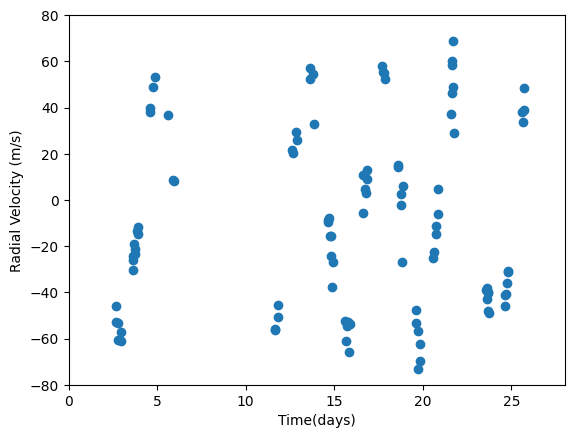

In [ ]:
#@title Plot data
#@markdown Press play to show plot. Don't click into this cell until you've reproduced the plot below (ask your volunteer if you need help)!

# Secrets! looking at you
# function to plot the data
plt.scatter(smalldata.Time, smalldata.RV)
plt.xlabel("Time(days)")
plt.ylabel("Radial Velocity (m/s)")

plt.xlim(0,28)
plt.ylim(-80,80)
plt.show()

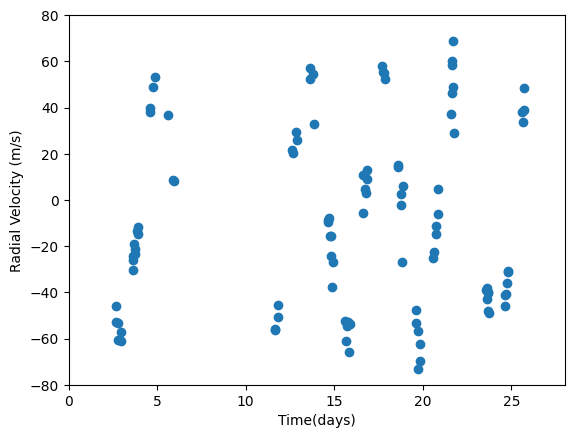

In [ ]:
## write your code here

plt.scatter(smalldata.Time, smalldata.RV)
plt.xlabel("Time(days)")
plt.ylabel("Radial Velocity (m/s)")

###
# use these two lines to adjust the limits of the plot
plt.xlim(0,28)
plt.ylim(-80,80)

# this line just shows the plot
plt.show()

This is actually data from the 51 Pegasus system. What do you notice about it? What are the horizontal and vertical axes showing? Adjust the axes limits of the plot to see if you can find any interesting patterns.


 <font size="6">Write some thoughts about it:</font>



- Looks like it is maybe periodic
- Velocity reaches maximum and minimum
- Pretty sparse overall
- Zooming in on days = 1–8 shows what seems to be one cycle of a sine curve



<figure>
<a title="NASA/Johns Hopkins University Applied Physics Laboratory/Southwest Research Institute, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Jupiter_New_Horizons.jpg"><img width="512" alt="Jupiter New Horizons" src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Jupiter_New_Horizons.jpg?20171022072853">
<figcaption><a href="https://commons.wikimedia.org/wiki/File:Jupiter_New_Horizons.jpg">NASA/Johns Hopkins University Applied Physics Laboratory/Southwest Research Institute</a>, Public domain, via Wikimedia Commons</figcaption>
</a>
</figure>

You might've noticed that — if you squint a little — the velocity looks sort of like a sine curve (or at the very least, it increases and decreases repeatedly). Recall Grade 11 maths: this is a well-understood function from trigonometry! You might know that there are four parameters that we can adjust to change the shape of a sine curve, which we'll get into more in a second

The data making this sine curve are showing the wobbling of a star as it moves around under the force of a nearby planet (they're both orbiting the system's center of mass). What are some properties of a planet? How might they affect the wobbling of the star? *(Hint: remember what we said about gravity earlier? Also, think about the different planets in the solar system and how they each might make the Sun move.)*


<font size="6">List some properties of a planet and say how each of them might impact how the star moves. </font>

- mass (larger mass -> more motion)
- separation (smaller separation -> more motion)
- orbit period (faster orbit -> faster motion)
- radius (doesn't impact)

Have some ideas? Great! Now we need to figure out what the amplitude and period of this sine curve are. To do that, we need to "fit" the data to a curve. "Fitting" data is shorthand means figuring out the parameters of a function that best model the data. Here, we want to find the values of amplitude and period that make the most sense (those that have the "best fit") with the data we have.

To do this, it's useful to write out the equation for a sine curve,

$$
y = a\sin\left(k[x-d]\right) + c.
$$

In the cell below, there are some sliders to make a sine curve out of a list of $x$ values. Play with a few different values $a$, $k$, and $d$ and $c$ to see how the sine curve changes for different values of these parameters.

In [ ]:
#@title Play some values
#@markdown Press the play button  and play with the slider to find which values makes the data agree approximaly good.

def functofit(x,a,k,d,c):
  return a*np.sin(k*(x-d))+c

def plot_est(a,k,d,c):
    x = np.linspace(0,25,500)
    plt.scatter(smalldata.Time, smalldata.RV)
    plt.plot(x, functofit(x,a,k,d,c))
    plt.xlabel("Time(days)")
    plt.ylabel("Radial Velocity (m/s)")
    plt.show()

interact(plot_est,a=(20,70),k=(1,5,0.1),d=(0,5,0.1),c=(-10,10));

interactive(children=(IntSlider(value=45, description='a', max=70, min=20), FloatSlider(value=3.0, description…

When thinking about our star and planet, the equation represents:

* $y$ value is the **radial velocity** from the plot above
* $x$ value is **time** in days.
* You should have noticed that the $a$ parameter controls the amplitude in m/s.
  - $0<|a|<1$ : vertical compression by a factor of $|a|$
  - $|a|>1$: vertical stretch by a factor of $|a|$
  - $a<0$ (negative) : reflection in x-axis (horizontal flip)

* The $k$ parameter controls the space between peaks and has units of $\frac{1}{\text{days}}$. It is the inverse of the period $T = \frac{360^\circ}{|k|}$
  - $0<|k|<1$: horizontal stretch by a factor of $\frac{1}{|k|}$
  - $|k|>1$: horizontal compression by a factor of $\frac{1}{|k|}$
  - $k<0$ (negative): reflection in y-axis (vertical flip)

* The $d$ parameter controls the phase shift, or where everything starts
  - $d>0$ (ie - sign in the middle): right shift $|d|$ units
  - $d<0$ (ie + sign in the middle): left shift $|d|$ units


 * $c$ moves the curve up or down on the $y$ axis.
  - $c>0$: up shift |c| units
  - $c<0$: down shift |c| units

We now want to figure out what values of $a$, $k$, $d$, and $c$ best fit the data that we saw before. Luckily, because fitting data is a pretty common task, Python has some built-in packages that can help us do this. Below, we'll use the curve_fit function, a tool from the package scipy, which allows us to find the best-fit parameters for a wide range of basic curves (like a sine curve!) given some data.



## Find the best values

You might have guessed that we have an equation and 4 unknown values that we need to find: $a$, $k$, $d$ and $c$.

Because the some of the values are inside a $sin$ function, it is not posible to solve them by hand. So we will rely on code to do it for us.



### Review the line



We will use the `curve_fit` function to do this for us, but before you apply it let's do a review using the simplest of functions, a **straight line**.

You might recall that a straight line is given by
$$
  y= b + mx
$$

where:

- $m$ is the slope (or inclination of the line)
- $b$ is the intercept (or the place where the line crosses the $y$ axis)

As an example, let's make some fake data, then use `curve_fit` to find the line that best fits the data.

In [ ]:
#@title Here is the line
#@markdown Run to produce the data

# here we generate 100 random x-values from 0 to 50
n = 100
x_line = np.random.uniform(0,50,n)

# then we say that our data follows a perfect line,
#  with slope m=3 and intercept b=2
y_line = 2 + 3*x_line

# in this line, we are generating some random noise for
#  each of our y-values.
#  This noise comes from a "Gaussian" (or "Normal") distribution
y_noise = np.random.normal(0,8,n)

# finally, we add our noise to the perfect y-values
#   to get some simulated noisy data
y_line = y_line + y_noise

We have prepared two vectors of data: `x_line` and `y_line`. Why don't you plot the scatter plot below.

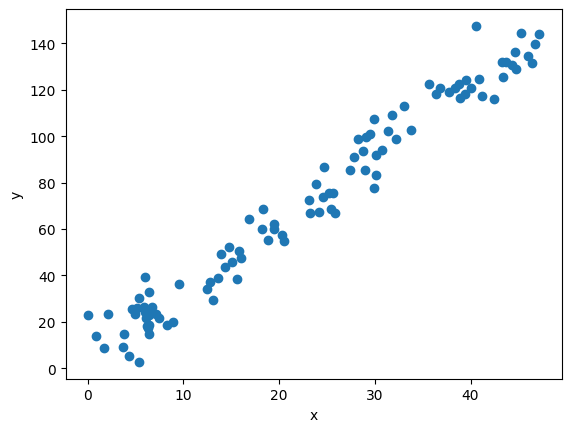

In [ ]:
### Insert your code here
plt.scatter(x_line, y_line)

####
plt.xlabel("x")
plt.ylabel("y")
plt.show()

So we can see the data, and we can see that it roughly follows a line, but what are the best parameters describing that line?

As mentioned before we can find them using `curve_fit`. This is a function, and some functions require to be provide *arguments*. There are many but for our case you only need to use:
```
curve_fit(functiontofit, x_values, y,values, p0=list_of_guesses)
```

The arguments are as follow:

- `functiontofit` is the function you want to fit, e.g. the function of a line.
- `x_values` is the array with x data values.
- `y_values` is the array with y data values.
- `p0` is a *named argument*. A named argument is a special argument that you have to specify its value, hence the equal sign.
- `list_of_guess` is a list or array with initial values, where the function tries to find the solutions.

The function `curve_fit` always returns two arrays: `popt`, `pcov`.

- `popt` is an array with the best values we look for.
- `pcov` is called a covariance. **Don't worry about it, you don't need it for this project**, but it is a statistical tool that researchers use to understand how one variable impacts another.

So the way you should use it is:

```
popt, _  = curve_fit(functiontofit, x_values, y,values, p0=list_of_guesses)
```

The `_` in `popt, _ =` recognizes that `curve_fit` should be giving us back two arrays, but it basically tells the code that we are ignoring the second array — we're not assigning it to any variable.



### fit the line

Now it is your turn to  find the best values for the line before. Here is a checkbox of things you will need to do:

- [ ] Create the function to fit
- [ ] Provide initial guesses
- [ ] Use `curve_fit` to find the best values
- [ ] Plot/graph the data and plot/graph the fitted line



We will help you a little, first you need to defined the function to fit:

In [ ]:
def line_function(x,b,m):
  """
  Write a function to return y-values for input x according to the equation for a line
  """
  ### Write your code between the comments

  y = b + m*x

  ###
  return y

In [ ]:
# @title Initial values
#@markdown Because `curve_fit` has to try  to find the values, it has to start somewhere. It could do it by itself,
#@markdown but this could take longer or cause it to try useless numbers.
#@markdown For this purpose, we have to provide some initial "guesses" to help the function
#@markdown to find the best values. If you look at the points of the lines, you could have a guess
#@markdown of the value where it crosses the $y$ axis, and the inclination/slope.

#@markdown Do not forget to run this after putting some values.

b_initial = 1.0 # @param {type:"number"}
m_initial = 1.0 # @param {type:"number"}


The cell above will create two numbers you should use `b_initial` and `m_initial`. The next line we will help you a litle, but it is up to you to complete it, you can use the  example above of how `curve_fit` is used, you should have everything necessary.

In [ ]:
initial_guesses = [b_initial, m_initial]

## Write your code between the comments to find the solutions using curve fit

popt, _ = curve_fit(line_function, x_line, y_line, p0=initial_guesses)

###

print("The solutions are:\nb = {:.3f}  \nm = {:.3f}".format(popt[0],popt[1]))

The solutions are:
b = 4.411  
m = 2.943


**Note to volunteer**: the exact parameters are `b=2` and `m=3`

Remember `popt` is an array, so to get the values you need to use indexes. The order is always the order they are in the function, for example in the `line_function(x,b,m)`, `b` would be index 0, and `m` index 1.

Now it's time to see if the line parameters you found make sense with the fake data! In the cell below, use the function you wrote for the equation of the line to show the best fit to the mock data, then plot both the data and the best fit!

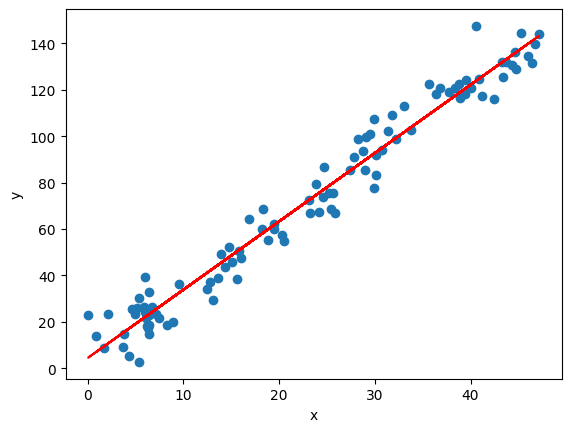

In [ ]:
# use the line function you wrote earlier to get predicted y-values
y_solution = line_function(x_line, popt[0], popt[1])

###  Write your code between the comments to plot the data and line
plt.scatter(x_line, y_line)
plt.plot(x_line, y_solution, color='red')

####
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### Back to the planet

Now that we've learned how to use curve fit, the procedure is exactly the same for fitting a sine curve:

- [ ] Create the sine function to fit
- [ ] Provide initial guesses
- [ ] Use `curve_fit` to find the best values
- [ ] Plot the data and plot the fitted line

#### The sine function

We still will help you a little below there is the proposed definition for the function to fit, check above the equation so you get it right.

Hint: you have to use `np.sin`

In [ ]:
def functofit(x,a,k,d,c):
  """
  Write a function to return y-values for input x according to the equation for a sine curve
  """
  ## Write your code between the comments

  y = a*np.sin(k*(x-d))+c

  ###
  return y

In [ ]:
# @title Initial Guesses
#@markdown We need to make some initial guesses to find the best solution.

#@markdown Thinking back to the sliders you were playing around with earlier,
#@markdown add in some initial guesses for each parameter (these don't have to be precise!)
#@markdown and press play to run the cell.

a_initial = 60 # @param {type:"number"}
k_initial = 1.5 # @param {type:"number"}
d_initial = 1.0 # @param {type:"number"}
c_initial = 1.0 # @param {type:"number"}

Okay, now it's time to apply your completed function to the data we have above. Use the function to return the best fit parameters for the data. We will help you a little, but you should be able to write a lot of this cell on your own *(hint: it's mostly the same as the cell fitiing a line we did above!)*

In [ ]:
time_array_x = smalldata.Time
rv_array_y = smalldata.RV


## Write your code between the comments

initial_values = [a_initial,k_initial,d_initial,c_initial]
popt, _ = curve_fit(functofit, time_array_x, rv_array_y, p0=initial_values)

###
print("The best parameters are:\n a = {:.3f}  \n k = {:.3f} \n d = {:.2f} \n c = {:.3f}".format(popt[0],popt[1],popt[2],popt[3]))

The best parameters are:
 a = 56.297  
 k = 1.485 
 d = -0.25 
 c = -1.589


Great! Now plot the RV data and plot a sine curve with the best-fit parameters you just found.

We provided `x_for_line` to use as the x-values for the curve. Hopefully they show a pretty good match :)

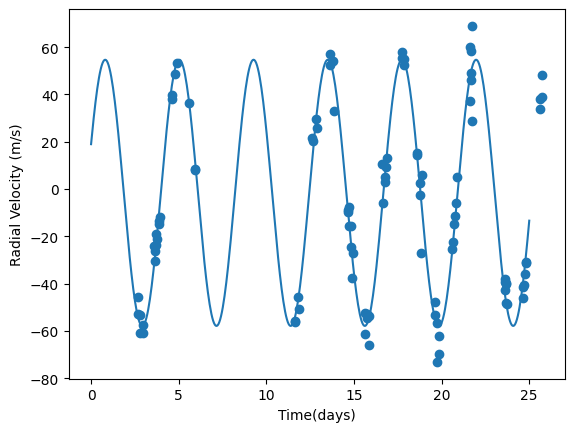

In [ ]:
x_for_line=np.linspace(0,25, 500)

## write your code below

plt.plot(x_for_line,functofit(x_for_line, popt[0],popt[1],popt[2],popt[3] ), label="fit")
plt.scatter(time_array_x,rv_array_y, label="fit")

###
plt.xlabel("Time(days)")
plt.ylabel("Radial Velocity (m/s)")
plt.show()

## Extension: Folding

**Come back to this section at the end if you have more time, or check it out after the workshop is over if you'd like to learn a little more!**

**For now, skip ahead to "From Parameters to an Orbit"**

Another interesting way to observe how the data is a similar to a sine function is by "folding" it. The data we've been working with shows us only small fragments of different periods of the overall sine curve. If we can figure out the period, we can try to mesh all of these fragments together to see one full, uninterrupted period of the sine curve. (In math terms, we're taking the *modulo* of the data so every period starts from 0 — *how do you take a modulo in Python?*)

### Modulo operation

The modulo oeration is similar how we track time. If you count in minutes, you will say 1,2,3,..,59 minutes, but as soon your reach 60 minutes, it becomes 1 hour. If we have 70 minutes, it is 1 hour and 10 minutes. Once you reach a value you "wrap up" and re-start counting.

If you recall division, you have an integer part and a remainder. For example,  5/2  but also can also be expressed as $\frac{4+1}{2} = 2 + 1/2$, or in other words it has a quotient of 2 and a reminder 1.

The modulo operation does precisely that — it returns the **remainder** of a value once it "wraps up". In the example above, 5 modolo 2 is 1, as 2 goes into 5 twice with a remainder of 1.

In python, the modulo operation uses '%'

```
5%2 = 1
```

This basically means that we shift the *time* values of each of our data points (changing where they fall on the $x$ axis) so they're all close together, by "wraping them up".

Think about how someone would go about folding the data you've seen above. In the next cell, we've given you a function to do this.

We will add an extra line that you will need for this as $k$ is not in degrees, we will convert it first to the period $T$

In [ ]:
sol_k_degrees = np.degrees(popt[1])
T = 360/sol_k_degrees
print("The period is {:.2f} days".format(T))

The period is 4.23 days


Now you have everything you need to produce the folding, as this is done in time, you have to use `time_array_x`.  The folding is done in "time" or the x  axis in this case, look at what is goint to be plotted in the scatter.

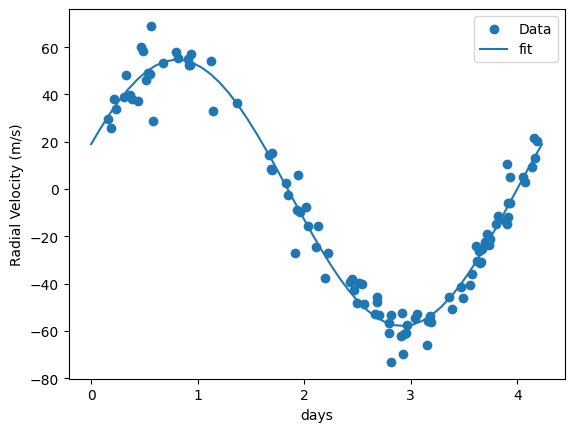

In [ ]:

## Write your code between the comments

time_folded = time_array_x%T

###
plt.scatter(time_folded, rv_array_y, label="Data")

# These two lines plot the best fit curve on this folded data.
# You don't need to understand these
time_period = np.linspace(0, T)
plt.plot(time_period, functofit(time_period, popt[0],popt[1],popt[2],popt[3] ), label="fit")

plt.xlabel("days")
plt.ylabel("Radial Velocity (m/s)")
plt.legend()
plt.show()

# From Parameters to an Orbit

We've found the sine curve parameters that best match the radial velocity data for this system — but what does it *actually* tell us about the planet itself?

First, let's think about the period. **What's the relationship between the period of the sine curve and the period of the orbit?** (The answer is right below this picture, so try to think of something before scrolling down!)

<figure>
<a title="NASA/Johns Hopkins University Applied Physics Laboratory/Southwest Research Institute, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Jupiter_New_Horizons.jpg"><img width="512" alt="Jupiter New Horizons" src="https://upload.wikimedia.org/wikipedia/commons/c/c1/Jupiter_New_Horizons.jpg?20171022072853">
<figcaption><a href="https://commons.wikimedia.org/wiki/File:Jupiter_New_Horizons.jpg">NASA/Johns Hopkins University Applied Physics Laboratory/Southwest Research Institute</a>, Public domain, via Wikimedia Commons</figcaption>
</a>

If thought that the period of the curve is exactly the same as the period of the planet's orbit, you'd be absolutely right. So what does that tell us?

Kepler's third law tells us that the period is related to the distance that a planet is from its host star by the following equation:

$$
T^2 = \frac{4\pi^2a^3}{GM_\star},
$$
where
* $T$ is the period — which you just found! Remember it is in **days** you have to convert to **seconds**.
* $a$ is the distance between star and planet, also known as the *semi-major axis*.
* $G$ is Newton's gravitational constant ($G = 6.67 \times 10^{-11}\; \rm{m}^3 \rm{kg}^{-1} \rm{s}^{-2}$ throughout the Universe). This is a universal constant that relates how strongly two bodies are atracted to each other. Consider it a fixed number!

* $M_\star$ is the mass of the host star.

On pen and paper, rearrange this to get an equation for the semi-major axis $a$ given the period $T$, the mass of the star $M_\star$, and the gravitational constant $G$.

We know what $T$ is for this planet — we just found the parameter `k` of the sine curve (in radians), which you know how to convert to a period (in days) — and we know what $G$ is in all cases. We can make an assumption about how massive the star is: let's say it's the same mass as our Sun. Then we can calculate the separation of this orbit!

Let's do this in the cells below (make sure to keep track of units!)

In [ ]:
#@title Prepare your constants
#@markdown Gravtitational constant, in meters^3 / (Kilograms seconds^2)

G = 6.67e-11  # @param {type:"number"}

#@markdown  M_star = Mass of the Sun, in kilograms
M_star = 1.989e30   # @param {type:"number"}

# @markdown Don't forget to run the cell!

In [ ]:
# The period of the orbit is one of the parameters we found by fitting the data!
# Define this variable based on the fit you've done
# The fit gave you k in radians — convert it to degrees, then use the equation relating T and k to find the period in days
k = popt[1]
period = 360/np.degrees(k)
# Finally, convert the period to seconds
period = period * 86400

In [ ]:
######## Now you need to fill in the equation for separation that you just figured out on pencil and paper
a_Planet = (G*M_star*period**2/(4*np.pi**2))**(1/3)
# If you've been keeping track of units, you should know that this is in meters --- change it to kilometers when you print!
# Make sure you change the word UNITS in the next line to be the proper units!
print('The planet has an average separation of {:.3f} km'.format(a_Planet * 1/1000))

The planet has an average separation of 7659439.550 km


The separation is an important thing to know. The Earth's orbit has a separation of $a_{\rm{Earth}} = 1.496 \times 10^{8} \; \rm{km}$. How many times bigger or smaller is this planet's separation? Remember to double check the units.

In [ ]:
# @markdown Earth separation, in kilometers
a_Earth = 1.496e8 # @param {type:"number"}

#@markdown Don't forget to run the cell

In [ ]:
### Fill in an equation to compute the separation ratio
a_ratio = (a_Planet/1000)/a_Earth
###

print('The planet is {:.3f} times the separtion of the Earth from its host star'.format(a_ratio))

The planet is 0.051 times the separtion of the Earth from its host star


Earth's separation is defined as one **astronomical unit** (abbreviated as $\rm{AU}$). The value you just computed is the separation of this planet in $\rm{AU}$. Look up 51 Peg b — that's the planet you're studying! — and see if this is actually its separation (often listed as "semimajor axis").

Now that we have the distance between the star and the planet, we can figure out how massive the planet is. As you might have guessed, the more massive a planet, the bigger the amplitude of the radial velocity sine curve. But how do we get the actual mass of the planet? It's gonna take a couple steps.

The velocity of a planet on a circular orbit is always (don't worry where this equation came from)

$$
v_{\rm{Planet}} = \sqrt{\frac{GM_\star}{a}},
$$
where, again,


*   $G$ is Newton's gravitational constant,
*   $M_\star$ is the star's mass, and
*   $a$ is the planet's separation.


So assuming this planet has a circular orbit, what's its velocity? (Make sure your units are correct!)

In [ ]:
#### Fill in an equation to compute the velocity of the planet, assuming it's on a circular orbit

v_Planet = np.sqrt(G*M_star/a_Planet)

###
print('The planet has a circular velocity of {:.3f} km/s'.format(v_Planet/1000))

The planet has a circular velocity of 131.608 km/s


Now, with one final relationship, we can figure out the mass of the planet. That relationship is

$$
M_{\rm{Planet}} v_{\rm{Planet}} = M_\star v_\star,
$$

where $v_\star$ is the star's velocity (which we have data for!). This is just a consequence of Newton's laws of gravity — but again, don't worry too much where this came from!

The data we were looking at show you the radial velocity of the star, $v_\star$, over the course of one orbit.

Note the word "radial" — this curve can only show us how quickly the star is moving toward us or away from us! However, as it orbits around the center of mass, it spends some time travelling in a second direction, meaning its radial velocity is lower. This is why the curve looks like a sine function; the star isn't slowing down and speeding up, but we're only ever seeing the part of the velocity that's moving *toward* us, and *that* part of the velocity is diminishing and increasing as the star orbits.

<figure>
<a title="Alysa Obertas, CC BY-SA 4.0 &lt;https://creativecommons.org/licenses/by-sa/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Radial_velocity_doppler_spectroscopy.gif"><img width="512" alt="Radial velocity doppler spectroscopy" src="https://upload.wikimedia.org/wikipedia/commons/c/cd/Radial_velocity_doppler_spectroscopy.gif"></a>
<figcaption>Radial velocity sketch by <a href="https://commons.wikimedia.org/wiki/File:Radial_velocity_doppler_spectroscopy.gif">Alysa Obertas</a>, <a href="https://creativecommons.org/licenses/by-sa/4.0">CC BY-SA 4.0</a>, via Wikimedia Commons</figcaption>
</figure>

The animations on the left of this gif show the motion of a model star and planet from two different perspectives. The bottom left panel shows what we would need to see in order to get a radial velocity curve — while it looks like the star is only going side to side, we can measure how quickly it's moving toward or away from us in this perspective!

The maximum and minimum of the curve represent the moments when the star is moving directly toward or away from us, the viewer. At these moments, we get to see the full velocity of the star, $v_\star$.

The amplitude of the sine curve — the maximum and minimum of the radial velocity — is then equal to $v_\star$ (in the units of the data!). Using this, the equation above, and other parameters you've calculated, **compute the mass of the planet in the cell below**. While some people work on that, someone in the group should look up the masses of Earth and Jupiter (in kilograms). Once both teams are ready, figure out how massive this planet is relative to both Earth and Jupiter.

In [ ]:
### You're on your own for this cell! Feel free to reuse certain snippets from the above cells.
M_planet = popt[0]*M_star/v_Planet
M_earth = 5.97e24
M_jupiter = 1.898e27

print('The planet has a mass of {:.3e} kg.'.format(M_planet))
print('That is {:.3f} times the mass of the Earth'.format(M_planet/M_earth))
print('or {:.3f} times the mass of Jupiter'.format(M_planet/M_jupiter))


The planet has a mass of 8.508e+26 kg.
That is 142.515 times the mass of the Earth
or 0.448 times the mass of Jupiter


Congratulations! You've detected a planet. You figured out how far it is from its star, and you figured out how massive it is, and you compared it to Earth and Jupiter! You did all this using the **radial velocity method**, where we look at how fast a star is moving toward or away from us over the course of one orbit.

# Part 2: Looking at the planets we've detected

You've found your first planet. Since it's orbiting a star other than the Sun, we call it an *exo*-planet. In the years since Mayor and Queloz made their big discovery nearly three decades ago, astronomers have found over *5,000 exoplanets* around the stars closest to us in our Galaxy.

What are some properties of these planets? Are they all roughly the same mass as Jupiter? Are they all really close to their stars? Luckily, NASA has something called the [Exoplanet Archive](https://exoplanetarchive.ipac.caltech.edu/), where astronomers keep data on each of these detected exoplanets (and exoplanet candidates, which haven't yet been confirmed).

Run the cell below to read in some data from the Exoplanet Archive.

In [ ]:
file_path = "https://raw.githubusercontent.com/alfa33333/CodeUniDataExo/main/exoplanet_data_noerrors.csv"
exo_data = pd.read_csv(file_path,skiprows=31,engine='python')
exo_data

,pl_name,hostname,default_flag,sy_snum,sy_pnum,discoverymethod,disc_year,pl_refname,pl_orbper,pl_orbsmax,...,pl_dens,pl_orbeccen,pl_eqt,ttv_flag,st_teff,st_mass,st_age,ra,dec,sy_dist
0,11 Com b,11 Com,1,2,1,Radial Velocity,2007,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,323.210000,1.178000,...,NaN,0.2380,NaN,0,4874.0,2.09,NaN,185.178779,17.793252,93.1846
1,11 UMi b,11 UMi,1,1,1,Radial Velocity,2009,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,516.219970,1.530000,...,NaN,0.0800,NaN,0,4213.0,2.78,NaN,229.274595,71.823943,125.3210
2,14 And b,14 And,1,1,1,Radial Velocity,2008,<a refstr=TENG_ET_AL__2023 href=https://ui.ads...,186.760000,0.775000,...,NaN,0.0000,NaN,0,4888.0,1.78,NaN,352.824150,39.235837,75.4392
3,14 Her b,14 Her,1,1,2,Radial Velocity,2002,<a refstr=FENG_ET_AL__2022 href=https://ui.ads...,1765.038900,2.774000,...,NaN,0.3730,NaN,0,NaN,0.91,NaN,242.602101,43.816362,17.9323
4,16 Cyg B b,16 Cyg B,1,3,1,Radial Velocity,1996,<a refstr=STASSUN_ET_AL__2017 href=https://ui....,798.500000,1.660000,...,NaN,0.6800,NaN,0,5750.0,1.08,NaN,295.465642,50.516824,21.1397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,ups And b,ups And,1,2,3,Radial Velocity,1996,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,4.617033,0.059222,...,NaN,0.0215,NaN,0,NaN,1.30,5.0,24.198353,41.403815,13.4054
5667,ups And c,ups And,1,2,3,Radial Velocity,1999,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,241.258000,0.827774,...,NaN,0.2596,NaN,0,NaN,1.30,5.0,24.198353,41.403815,13.4054
5668,ups And d,ups And,1,2,3,Radial Velocity,1999,<a refstr=CURIEL_ET_AL__2011 href=https://ui.a...,1276.460000,2.513290,...,NaN,0.2987,NaN,0,NaN,1.30,5.0,24.198353,41.403815,13.4054
5669,ups Leo b,ups Leo,1,1,1,Radial Velocity,2021,<a refstr=TENG_ET_AL__2021 href=https://ui.ads...,385.200000,1.180000,...,NaN,0.3200,NaN,0,4836.0,1.48,NaN,174.237219,-0.823564,52.5973


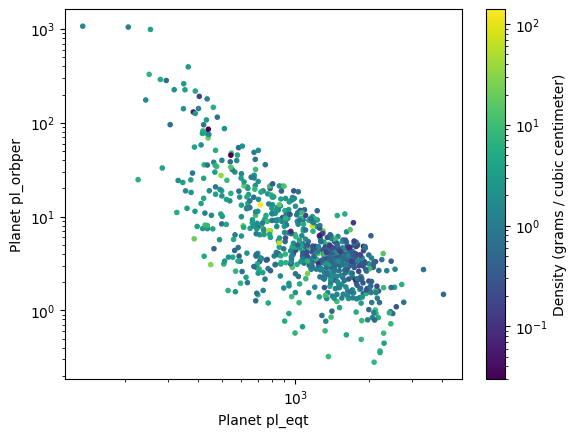

In [ ]:
#@title Exoplanet data
#@markdown Example of plotting two different properties for this dataset of planets as x and y coordinates (we've set the data to be colored by the planet's density).
#@markdown The student notebook doesn't include this cell

options = exo_data.columns
x_axis = 'pl_eqt' # @param [ 'sy_snum', 'sy_pnum', 'pl_orbper', 'pl_orbsmax',  'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_dens', 'pl_orbeccen', 'pl_eqt', 'st_teff', 'st_mass', 'st_age', 'ra', 'dec', 'sy_dist']
y_axis = 'pl_orbper' # @param [ 'sy_snum', 'sy_pnum', 'pl_orbper', 'pl_orbsmax',  'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_dens', 'pl_orbeccen', 'pl_eqt', 'st_teff', 'st_mass', 'st_age', 'ra', 'dec', 'sy_dist']
color_norm = True # @param {type:"boolean"}

norm_scaling = LogNorm() if color_norm else None
plt.scatter(exo_data[x_axis], exo_data[y_axis], c=exo_data['pl_dens'], marker='.',norm=norm_scaling)
plt.colorbar(label='Density (grams / cubic centimeter)')

plt.ylabel('Planet {}'.format(y_axis))
plt.xlabel('Planet {}'.format(x_axis))
plt.yscale('log')
plt.xscale('log')

plt.show()

Let's see how you can create your own plots and data. You can use the file we provided, but if you have some time at the end, it could be fun to go to the  [exoplanet archive](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS&constraint=default_flag=1&constraint=disc_facility+like+%27%25TESS%25%27) to
select your own data! We'll put some instructions on how to do this as an extension, but for now, keep going in the notebook.

**Extension:** *Go into the link above. Click the "Select Columns" button, and change the checkboxes to choose which properties of each planet you want to include in your dataset. When you're done, click "Update," then close the Selection pop-up after the page refreshes. Now you can click the "Download Table" button — if you want, select the box for "Values only," which will return a cleaner table with fewer properties. Click "Download Table," then find the csv file on the desktop and upload it to this Google CoLab.*

As you might have noticed above, there are a *bunch* of properties available for each planet. In Part 1, you found the period, semi-major axis, and mass of one planet. The Exoplanet Archive keeps records of these properties, as well as radius, temperature, and much more!

Each row is a different planet. Each column has a different property of that planet. Run the cell below to get a list of all of the properties we have access to in this dataset.

In [ ]:
exo_data.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum',
       'discoverymethod', 'disc_year', 'pl_refname', 'pl_orbper', 'pl_orbsmax',
       'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_dens', 'pl_orbeccen', 'pl_eqt',
       'ttv_flag', 'st_teff', 'st_mass', 'st_age', 'ra', 'dec', 'sy_dist'],
      dtype='object')

These columns are:
- `pl_name`: the name of the planet
- `hostname`: the name of its host star
- `default_flag`: 1 for all of the planets here. The exoplanet archive records different sets of parameters for the same planet if that planet has been analyzed by multiple different groups. Sometimes these groups find different values from the same (or different) data. `default_flag=1` indicates that the Archive is giving you what it considers the "default" parameters for a given planet.
- `sy_snum`: the number of stars in the system
- `sy_pnum`: the number of planets in the system
- `discoverymethod`: how the planet was discovered (e.g., radial velocity method, transit method)
- `disc_year`: year in which the planet was discovered
- `pl_refname`: the reference to the scientific article where these parameters were reported
- `pl_orbper`: the period of the planet's orbit
- `pl_orbsmax`: the planet's semi-major axis (its average separation from the host star)
- `pl_rade`: the planet's radius in units of Earth radii
- `pl_radj`: the planet's radius in units of Jupiter radii
- `pl_bmasse`: the planet's mass in units of Earth masses
- `pl_dens`: the planet's density
- `pl_orbeccen`: the eccentricity of a planet's orbit, or how far it is from being a perfect circle
- `pl_eqt`: an estimate of the temperature of the planet
- `ttv_flag`: is 1 if the planet was discovered by transits and if the timing of each transit appears to change — this often indicates more, unseen planets in the system
- `st_teff`: an estimate of the temperature of the host star
- `st_mass`: the host star's mass
- `st_age`: the host star's age
- `ra`: one of the coordinates telling us the system's location on the sky
- `dec`: the other coordinate telling us the system's location on the sky
- `dist`: the distance from us to the system

Phew! That's a lot of properties. You absolutely don't need to memorize them or anything like that — you can refer back to this list as you're exploring the dataset later.

As we'll see below, you can use these labels to select certain columns of the table. As an example, lets look at the temperatures and radii of the planets in our sample.

Before we move on, talk to your group-mates about what would be important to know for figuring out the temperature of a planet? Once you've discussed, run the cell below to make a plot of temperature vs. radius for the planets in NASA's archive.

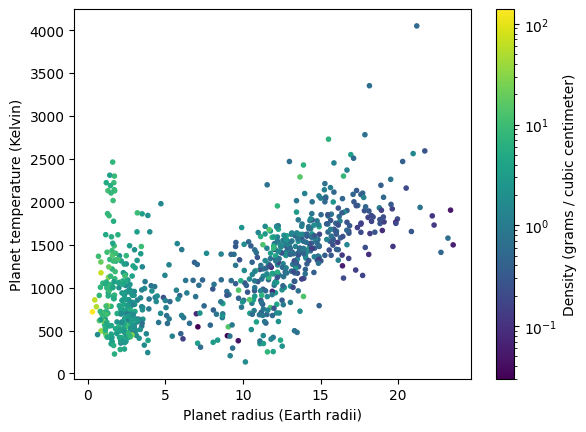

In [ ]:
temperatures = exo_data['pl_eqt']
radii = exo_data['pl_rade']

plt.scatter(radii, temperatures, c=exo_data['pl_dens'], marker='.', norm=LogNorm())
plt.colorbar(label='Density (grams / cubic centimeter)')

plt.ylabel('Planet temperature (Kelvin)')
plt.xlabel('Planet radius (Earth radii)')

plt.show()

Note how we were able to define "temperatures" and "radii" as variables containing arrays by picking a certain column of the data table. We also colored our data points based on the density of the planet by, similarly, calling a certain column of the table.

Notice that the color bar is not evenly spaced — it uses a *logarithmic scale*. This type of scaling lets you see a wide range of values more easily. To see why it's useful, take out the argument `norm=LogNorm()` in the scatter plot line, and run it again. What's different?

Without logarithmic (or "log") scaling, it can be hard to see much detail when you have a few data points with extreme values! You can also log-scale the axes of the plot to reveal more detail between the points. This might be useful for exploring the rest of the dataset later...

As some more practice, go back into the cell above and change the scatter plot color to be based on a different property of the planet or its host star. For example, maybe you want to see how the planet temperature (`pl_eqt`) changes with host star temperature (`st_teff`)

## Time to explore

With all these properties, there are so many ways to compare exoplanets. The rest of the project is completely open-ended! Take some time to make plots like the one above comparing different properties of planets. Are there any trends you can see?

What do *you* want to know about the exoplanets we've discvoered? How can you use the properties in the data we have to try to answer those questions? There are some more prompts in the next few cells, but feel free to spend the rest of your time as you wish! Talk with your volunteer if you need more ideas of what to look at, or if you get stuck at any point. Good luck! Have fun with it :)

Scientists often talk about "sub-populations" of exoplanets — these groups share one or more characteristics (for example, they might all have similar sizes or masses, or they might all have similar masses *and* all have semi-major axes less than $0.1 \;\rm{AU}$). What are some sub-populations you were able to find?

At the same time, some folks in the group should look up properties of the Solar System planets. Figure out a way to plot these properties alongside the properties of the exoplanets we've discovered so far. What do you notice? Do the Solar System planets fit in nicely with any sub-populations you've found?

Here are some prompts for the students if they feel stuck:
- If you wanted to live on another planet, you'd probably want liquid water. How many of the 5,000 exoplanets could have liquid water? Figure out what temperature they would need to have, and plot a histogram of planet temperatures. Then make scatter plots of temperature and some other properties — would you want to live on a more dense planet or a less dense one? Would we be able to live on a less dense one? (See the prompt below.)
- What densities do planets tend to have? What's the density of water? What about rock? What might planet densities tell you about what they're made of? Are there any trends between density and distance from the host star?
- Are there more planets around young stars or old stars? Make a histogram of star age. Are the planets around old stars closer or further from their host than those around young stars? Make a scatter plot comparing stellar age and planet orbit distance (semi-major axis).
- How many planets have been discovered each year? Make a histogram of discovery year. Why is this number climbing?
- Based on planet radii, masses, and semimajor axes, are the planets of the solar system "normal" considering exoplanets? Make some scatter plots to demonstrate this. Why might we not see planets like the solar system ones in our exoplanet data?

**Bonus:** You might have noticed that there's a column called "discoverymethod" — this, as you might guess, tells you how a given planet was discovered! One of the methods is the radial velocity method, but there are several others that we haven't discussed!

One of the key ones — which has been used to discover more planets than any other — is known as the "transit" method. This is useful when the planet occasionally passes between its host star and us. We can't see the planet itself, but we *can* see the light from the host star get slightly dimmer as the planet passes in front of it, then brighter again as the planet moves out from in front of it. This page from [NASA](https://science.nasa.gov/exoplanets/whats-a-transit/) has a more in-depth discussion of the transit discovery method.

**Task:** Choose two properties (for example, mass and semimajor axis) and make a scatter plot of these properties for all the planets in the data table. When plotting, use different colors for planets discovered by transits, planets discovered by the radial velocity method, and planets discovered by any other method.

What can you say about each of these methods?

*(For a hint, uncover the cell below to see how we printed the masses of all the planets discovered in 2007.)*

In [ ]:
# @markdown  This cell prints the masses of all planets discovered in 2007.
# @markdown Uncover for a hint on how to pick subsets of the data based on a certain property!
year_choice = 2018
exo_data['pl_bmasse'][exo_data['disc_year'] == year_choice]

8        280.64248
15      3686.80952
65       540.31100
101     5403.11000
126     3823.27330
           ...    
5488     104.88337
5611       6.27000
5637     357.87479
5638    1662.56040
5653       3.49611
Name: pl_bmasse, Length: 324, dtype: float64

<font size="8">Summary</font>


*   You used real astronomical data for the star system 51 Pegasi and applied the Radial velocity method.
*   You estimimated the Planet Mass, Orbit period and distance to the star.
*   You looked at the distribution of the exoplanets found to date.

